# Chapter 13: How to Model Animal Conflict

## 1. Introduction
Welcome to the interactive Jupyter Notebook for Chapter 13, "How to Model Animal Conflict." In this notebook, we will delve into the core concepts of the Hawk-Dove game through Python simulations. This hands-on experience will help you understand how game theory can be applied to model conflict strategies in biological systems, providing a practical approach to the theories discussed in the chapter.

Please follow along with the corresponding chapter in the book for a comprehensive theoretical background and detailed explanations of the concepts demonstrated here.

## 2. Understanding the Replicator Dynamics

Replicator dynamics is a key concept in evolutionary game theory, explaining how the distribution of strategies in a population changes over time based on their success. It helps us understand the natural selection of competing strategies within a population.

### The Mathematical Model

Replicator dynamics is captured by the following equation, which describes how the frequency of a strategy changes over time:

\[
\frac{d x_i}{d t} = x_i \left( f_i - \bar{f} \right)
\]

Where:
- \( x_i \) is the frequency of strategy \( i \) in the population,
- \( f_i \) is the fitness (or payoff) of strategy \( i \),
- \( \bar{f} \) is the average fitness (or average payoff) of all strategies, calculated as \( \bar{f} = \sum_{j=1}^{n} x_j f_j \),
- \( n \) is the total number of strategies.

This equation reflects natural selection: strategies with higher than average payoffs (\( f_i > \bar{f} \)) increase in frequency, while those with lower payoffs (\( f_i < \bar{f} \)) decrease.

### Key Insights

- **Selection of Strategies:** Replicator dynamics shows how natural selection favors strategies with higher payoffs, leading them to spread through the population.
- **Evolutionary Stability:** This model helps identify Evolutionarily Stable Strategies (ESS), where if all members of a population adopt an ESS, no new strategy can replace it under natural selection.
- **Application to Game Theory:** In game theory, replicator dynamics offers a dynamic view of how strategies evolve in games like the Prisoner's Dilemma.

By simulating replicator dynamics, we can observe these principles in action, gaining a deeper understanding of strategic evolution in competitive environments.

## 3. Replicator Dynamics and the Hawk-Dove Game

In this section, we explore the concept of replicator dynamics, a fundamental mechanism in evolutionary game theory. Replicator dynamics describe how the frequency of strategies in a population evolves based on their success relative to the average success in the population.

We will apply these dynamics to the classic Hawk-Dove game. In this scenario, individuals must choose between aggressive (Hawk) and passive (Dove) strategies, with the payoffs of each decision affected by the choice of the other individual.

The Hawk-Dove game illustrates the conflict between aggression and submission, where the best individual strategy depends on the strategies adopted by others in the population, leading to a dynamic balance between Hawks and Doves.

### Understanding the Replicator Dynamics

- **Hawk and Dove Strategies**: Individuals in a population can either adopt the Hawk (aggressive) or Dove (passive) strategy. The payoffs for each action depend on the action of the other individual.
- **Payoffs**: When two Hawks meet, they fight, and the winner takes the resource minus the cost of injury. When a Hawk meets a Dove, the Hawk takes the entire resource. When two Doves meet, they share the resource equally.
- **Evolution of Strategies**: Over time, strategies that perform better than the population average increase in frequency, while those that perform worse decrease.

### Exploring the Dynamics

In the following code cells, we will simulate these dynamics and visualize how the proportion of Hawks and Doves changes over time under different initial conditions and payoff structures. Observe how a balance between aggression and submission can emerge as a stable strategy in the competitive setting of the Hawk-Dove game.

In [1]:
# Import NumPy for numerical operations
import numpy as np

# Import matplotlib for plotting
import matplotlib.pyplot as plt
import seaborn as sns  # Seaborn for better plot aesthetics

# Set the plot style for better visuals
sns.set_style('darkgrid')

# Ensure plots are displayed in the notebook
%matplotlib inline

In [2]:
def replicator_dynamics(payoff_matrix, strategy_frequencies):
    """
    Calculate how strategy frequencies change over time based on payoffs.

    Parameters:
    payoff_matrix (numpy.ndarray): Matrix where payoff_matrix[i, j] is the payoff for strategy i against strategy j.
    strategy_frequencies (numpy.ndarray): Current frequencies of each strategy in the population.

    Returns:
    numpy.ndarray: The change in frequency of each strategy.
    """
    
    # Calculate the average payoff for each strategy using matrix multiplication (@).
    # The @ sign performs matrix multiplication between the payoff matrix and the strategy frequencies.
    average_payoffs = payoff_matrix @ strategy_frequencies
    
    # Calculate the overall average payoff in the population.
    average_population_payoff = strategy_frequencies @ average_payoffs
    
    # Determine how the frequency of each strategy changes.
    change_in_frequencies = strategy_frequencies * (average_payoffs - average_population_payoff)
    
    return change_in_frequencies

In [3]:
# Hawk-Dove Game Payoffs
# Define the payoffs for the Hawk-Dove game, a fundamental model in game theory
# that illustrates the evolution of conflict and cooperation strategies among animals.
# In this game, the players choose between two strategies: Hawk (aggressive) and Dove (non-aggressive).
# The payoffs depend on the value of the resource (V) and the cost of fighting (C).

V = 2  # Value of the resource
C = 3  # Cost of injury from a fight

# Payoff matrix for the Hawk-Dove game
# This matrix represents the payoffs for each combination of strategies between two players.
# The rows represent the strategy chosen by the player implementing the matrix, and the columns
# represent the strategy chosen by the other player. Each entry (i, j) in the matrix corresponds
# to the payoff the player receives when they choose strategy i and the other player chooses strategy j.
payoff_matrix = np.array([
    [(V - C) / 2, V],  # Row 0: Payoffs when the player is Hawk (Hawk-Hawk, Hawk-Dove)
    [0, V / 2]         # Row 1: Payoffs when the player is Dove (Dove-Hawk, Dove-Dove)
])

# The resulting payoff matrix with V = 2 and C = 3 will be:
# [
#   [-0.5, 2],  # Payoffs for Hawk (Hawk-Hawk, Hawk-Dove)
#   [0, 1]      # Payoffs for Dove (Dove-Hawk, Dove-Dove)
# ]

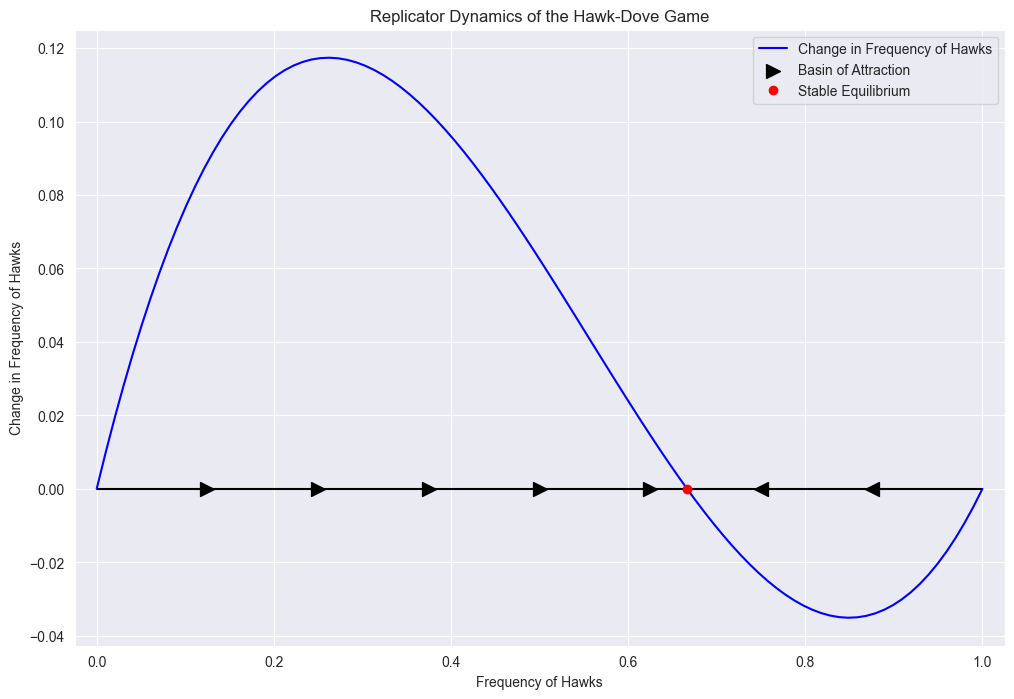

In [4]:
# Define the range of strategy frequencies for the Hawk strategy
# Creates an array of 100 evenly spaced values between 0 and 1. These represent the proportion of the population
# adopting the Hawk strategy, varying from no Hawks (0) to all Hawks (1).
p = np.linspace(0, 1, 100)
diff_hawk = []  # Initialize a list to store the change in Hawk frequency for each proportion

# Calculate the change in Hawk frequency across the range of Hawk strategy levels
for freq in p:
    # For each frequency of Hawks, calculate the corresponding frequency of Doves
    strategy_frequencies = np.array([freq, 1 - freq])
    # Use the replicator dynamics function to calculate how the frequency of Hawks changes
    change = replicator_dynamics(payoff_matrix, strategy_frequencies)
    # Append the change in Hawk frequency to the list
    diff_hawk.append(change[0])  # Focus on the change in Hawk frequency

# Plotting the results
plt.figure(figsize=(12, 8))
# Plot the change in Hawk frequency against the Hawk frequency itself
plt.plot(p, diff_hawk, color='blue', label='Change in Frequency of Hawks')
# Draw a horizontal line at y=0 from x=0 to x=1 to indicate no change in Hawk frequency
plt.hlines(0, xmin=0, xmax=1, color='black', linestyle='-')

# Indicate potential basins of attraction and stable equilibrium points
# Basins of attraction are marked with left-pointing triangle markers. They indicate frequencies
# at which small deviations in strategy frequencies would result in a return to the equilibrium.
for i in range(6, 8):
    plt.scatter(i/8, 0, marker='<', s=100, color='black', label='Basin of Attraction' if i == 1 else "")

for i in range(1, 6):
    plt.scatter(i/8, 0, marker='>', s=100, color='black', label='Basin of Attraction' if i == 1 else "")

# Plot the stable equilibrium point at 2/3 as a red circle ('ro')
stable_equilibrium_point = (2/3, 0)
plt.plot(stable_equilibrium_point[0], stable_equilibrium_point[1], 'ro', label='Stable Equilibrium')
    
# Set plot labels and title for clarity
plt.xlabel('Frequency of Hawks')
plt.ylabel('Change in Frequency of Hawks')
plt.title("Replicator Dynamics of the Hawk-Dove Game")
plt.legend(loc='best')  # Place the legend in the best location determined by Matplotlib
plt.xlim(-0.025, 1.025)  # Slightly extend the x-axis limits for visual clarity

# Save the figure with high resolution
plt.savefig('phase_diagram_hawk_dove.png', dpi=300)

# Display the plot
plt.show()


### 4. Explaining the Plot

The graph shows how the strategies of "Hawk" and "Dove" evolve over time within a population playing the Hawk-Dove game, based on replicator dynamics. The x-axis, labeled "Frequency of Hawks," represents the proportion of the population that chooses the Hawk (aggressive) strategy at any given time, ranging from 0 (no Hawks, all Doves) to 1 (all Hawks, no Doves).

The y-axis, labeled "Change in Frequency of Hawks," shows the rate of change in the population's proportion of Hawks. Positive values indicate an increasing trend in the Hawk strategy, while negative values indicate a decline in Hawks, leading to more Doves.

The blue curve represents the replicator dynamics — a mathematical description of how the frequency of Hawks changes based on the current state of the population. The payoffs for the Hawk and Dove strategies are influenced by the value of the resource \( V = 2 \) and the cost of injury \( C = 3 \). These values determine the shape and position of the curve.

#### How to Read the Plot:

- **Starting Points**: Any point on the x-axis represents a possible starting frequency of Hawks in the population.
- **Trajectory of Change**: From any starting point, move vertically to the curve to understand the initial change in the Hawk strategy. If the curve is above the x-axis (positive y-value), the Hawk frequency will increase; if below (negative y-value), it will decrease.
- **Equilibrium Point**: The red dot on the x-axis represents a stable equilibrium at approximately \( \frac{2}{3} \). At this point, the change in the frequency of Hawks is zero — meaning the population will remain at this proportion of Hawks and Doves if it starts here.
- **Basin of Attraction**: The black arrows (or triangles) on the plot indicate the direction of change towards the stable equilibrium. They show that whether the initial frequency of Hawks is above or below \( \frac{2}{3} \), the population will eventually be "pulled" toward this equilibrium point.
- **Interpreting Dynamics**: The plot suggests that in this particular Hawk-Dove setup, the population will settle at a mixed strategy equilibrium where about two-thirds of the population are Hawks and one-third are Doves. This reflects a balance between aggression and submission, influenced by the payoffs for each strategy.

In summary, this plot visualizes the strategic dynamics within a population playing the Hawk-Dove game. It shows how the proportion of Hawks and Doves evolves over time and helps us understand the conditions under which a stable mix of strategies is achieved. For the given payoff values, the population is expected to stabilize at a point where both Hawks and Doves coexist in specific proportions.

In [5]:
# Import the plot_static function from egtplot
# The egtplot library is specifically designed for visualizing evolutionary game theory (EGT) models. The plot_static function is used to create static visual representations of evolutionary game dynamics. These visualizations can depict the phase space of strategies, showing equilibrium points, strategy stability, and population dynamics over time. Using plot_static enhances the interpretability of EGT simulations, making it easier to convey complex dynamics and outcomes through graphical means.
from egtplot import plot_static

1it [00:00, 10.61it/s]


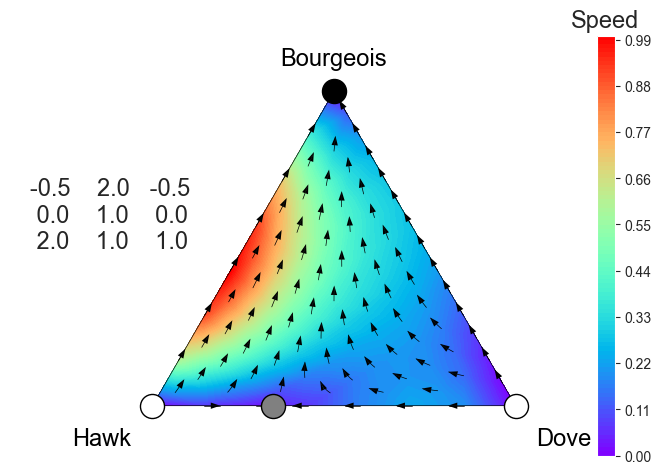

In [6]:
payoff_entries = [
    [-0.5],  # Hawk vs Hawk
    [2],     # Hawk vs Dove
    [-0.5],  # Hawk vs Bourgeois (assuming Bourgeois is owner)
    [0],     # Dove vs Hawk
    [1],     # Dove vs Dove
    [0],     # Dove vs Bourgeois (assuming Bourgeois is owner)
    [2],     # Bourgeois vs Hawk (assuming Bourgeois is owner)
    [1],     # Bourgeois vs Dove (assuming Bourgeois is owner)
    [1]      # Bourgeois vs Bourgeois (assuming neither is owner)
]

# The labels corresponding to these payoffs
labels = ["Hawk", "Dove", "Bourgeois"]

simplex = plot_static(payoff_entries, vert_labels=labels, background=True)

## 10. Understanding the Simplex Plot

The `egtplot` library in Python is used to visualize evolutionary game theory (EGT) dynamics, including phase portraits and simplex diagrams. EGT examines how strategies evolve in a population based on their interactions with other strategies.

In this case, the plot is a simplex plot, which shows the frequencies of three strategies in a population. Here’s how to interpret the plot:

1. **Vertices**: Each corner of the triangle represents a state where the entire population uses one strategy. The left corner is for the first strategy, the right corner for the second, and the top corner for the third.

2. **Interior Points**: Points inside the triangle represent a mix of strategies. The closer a point is to a vertex, the higher the proportion of that strategy in the population.

3. **Color Gradient (Speed)**: The color within the triangle indicates the speed of changes in strategy frequencies. Warmer colors show faster changes, while cooler colors show slower changes. The color bar on the side provides the scale.

4. **Arrows**: Arrows point in the direction of evolutionary dynamics. Starting from any point inside the triangle, following the arrows shows how the population's strategy mix will evolve over time.

5. **Fixed Points**: These are marked by symbols:
   - **Open Circle**: Unstable fixed point. If the system is slightly perturbed, it will move away from this point.
   - **Filled Circle**: Stable fixed point. The system will evolve towards this point.
   - **Star**: Saddle point. Stable in one direction, unstable in another.

### Reading the Plot

- Starting from any point inside the triangle, you can predict how strategies will evolve by following the arrows. The population will generally move towards stable fixed points (filled circles) and away from unstable ones (open circles).

- The edges of the triangle represent mixed strategies involving two of the strategies. For example, the midpoint of an edge represents a 50-50 mix of the two strategies at the connected vertices.

- This plot shows the dynamics in a three-strategy game, highlighting which strategies are likely to persist or disappear over time based on the evolutionary dynamics.

This simplex plot is a valuable tool for understanding the dynamics of multi-strategy games in EGT, helping to visualize which strategies will dominate, coexist, or be eliminated over time.